In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing

In [2]:
import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam
import matplotlib.pyplot as plt

In [3]:
train_data_path = 'C:\\Users\\kariketi.t.reddy\\Downloads\\Plants_disease_dataset\\New Plant Diseases Dataset(Augmented)\\New Plant Diseases Dataset(Augmented)\\train'
test_data_path = 'C:\\Users\\kariketi.t.reddy\\Downloads\\Plants_disease_dataset\\New Plant Diseases Dataset(Augmented)\\New Plant Diseases Dataset(Augmented)\\valid'

In [4]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20, 20))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
    plt.tight_layout()
    plt.show()

In [5]:
training_datagen = ImageDataGenerator(rescale=1./255,
                                      rotation_range=40,
                                      width_shift_range=0.2,
                                      height_shift_range=0.2,
                                      shear_range=0.2,
                                      zoom_range=0.2,
                                      horizontal_flip=True,
                                      fill_mode='nearest')

In [6]:
training_data = training_datagen.flow_from_directory(train_data_path, 
                                      target_size=(150, 150), 
                                      batch_size=25,
                                      class_mode='categorical')

Found 69858 images belonging to 38 classes.


In [7]:
test_datagen = ImageDataGenerator(rescale =1./255)

In [8]:
test_data = test_datagen.flow_from_directory(test_data_path,
                                  target_size=(150,150),
                                  batch_size=32,
                                  class_mode='categorical')

Found 17474 images belonging to 38 classes.


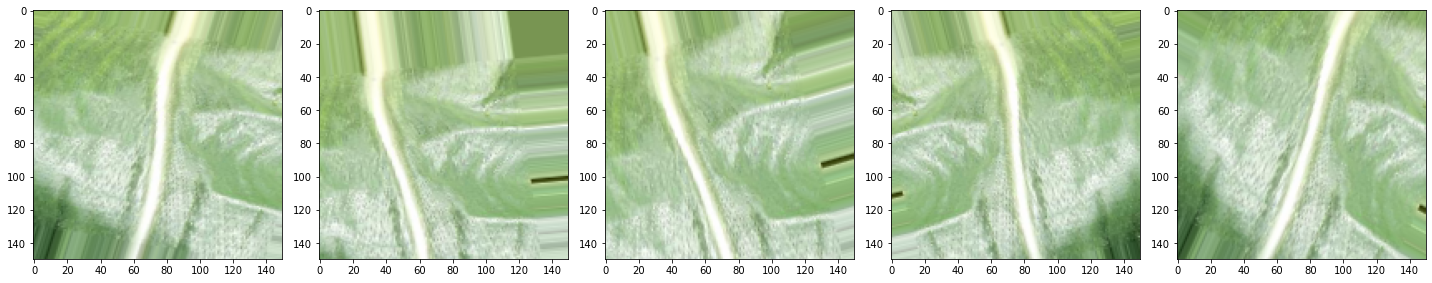

In [9]:
images = [training_data[0][0][0] for i in range(5)]
plotImages(images)

In [10]:
model = keras.models.Sequential([
                                    keras.layers.Conv2D(filters=32, kernel_size=3, input_shape=[150, 150, 3]),
                                    keras.layers.MaxPooling2D(pool_size=(2,2)),
                                    keras.layers.Conv2D(filters=64, kernel_size=3),
                                    keras.layers.MaxPooling2D(pool_size=(2,2)),
                                    keras.layers.Conv2D(filters=128, kernel_size=3),
                                    keras.layers.MaxPooling2D(pool_size=(2,2)),                                    
                                    keras.layers.Conv2D(filters=256, kernel_size=3),
                                    keras.layers.MaxPooling2D(pool_size=(2,2)),
 
                                    keras.layers.Dropout(0.5),                                                                        
                                    keras.layers.Flatten(), 
                                    keras.layers.Dense(units=128, activation='relu'), 
                                    keras.layers.Dropout(0.1),                                    
                                    keras.layers.Dense(units=256, activation='relu'),                                    
                                    keras.layers.Dropout(0.25),                                    
                                    keras.layers.Dense(units=38, activation='softmax') 
])

In [11]:
model.compile(optimizer=Adam(learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [12]:
history = model.fit(training_data, 
                          epochs=5, 
                          verbose=1, 
                          validation_data= test_data,
                          )

Epoch 1/5
2795/2795 [==============================] - 4081s 1s/step - loss: 2.4621 - accuracy: 0.3001 - val_loss: 2.4556 - val_accuracy: 0.3635
Epoch 2/5
2795/2795 [==============================] - 4496s 2s/step - loss: 1.6655 - accuracy: 0.4995 - val_loss: 1.7259 - val_accuracy: 0.5221
Epoch 3/5
2795/2795 [==============================] - 4588s 2s/step - loss: 1.3065 - accuracy: 0.5982 - val_loss: 1.3185 - val_accuracy: 0.6042
Epoch 4/5
2795/2795 [==============================] - 4820s 2s/step - loss: 1.0756 - accuracy: 0.6637 - val_loss: 1.0856 - val_accuracy: 0.6695
Epoch 5/5
2795/2795 [==============================] - 3969s 1s/step - loss: 0.9235 - accuracy: 0.7073 - val_loss: 0.9717 - val_accuracy: 0.6989


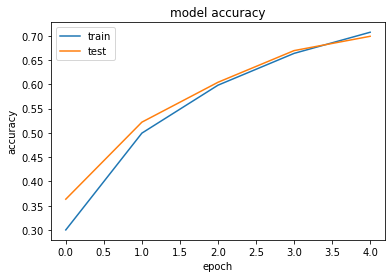

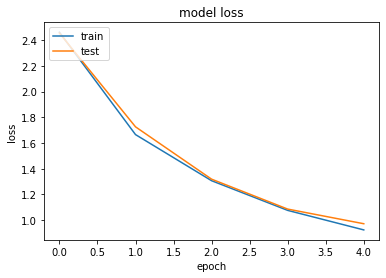

In [19]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [20]:
dict={0:'Apple___Apple_scab', 1:'Apple___Black_rot', 2:'Apple___Cedar_apple_rust', 3:'Apple___healthy', 4:'Blueberry___healthy', 5:'Cherry_(including_sour)___healthy', 6:'Cherry_(including_sour)___Powdery_mildew', 7:'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 8:'Corn_(maize)___Common_rust_', 9:'Corn_(maize)___healthy', 10:'Corn_(maize)___Northern_Leaf_Blight', 11:'Grape___Black_rot', 12:'Grape___Esca_(Black_Measles)', 13:'Grape___healthy', 14:'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 15:'Orange___Haunglongbing_(Citrus_greening)', 16:'Peach___Bacterial_spot', 17:'Peach___healthy', 18:'Pepper,_bell___Bacterial_spot', 19:'Pepper,_bell___healthy', 20:'Potato___Early_blight', 21:'Potato___healthy', 22:'Potato___Late_blight', 23:'Raspberry___healthy', 24:'Soybean___healthy', 25:'Squash___Powdery_mildew', 26:'Strawberry___healthy', 27:'Strawberry___Leaf_scorch', 28:'Tomato___Bacterial_spot', 29:'Tomato___Early_blight', 30:'Tomato___healthy', 31:'Tomato___Late_blight', 32:'Tomato___Leaf_Mold', 33:'Tomato___Septoria_leaf_spot', 34:'Tomato___Spider_mites Two-spotted_spider_mite', 35:'Tomato___Target_Spot', 36:'Tomato___Tomato_mosaic_virus', 37:'Tomato___Tomato_Yellow_Leaf_Curl_Virus'}

In [21]:
from tensorflow.keras.preprocessing import image
import numpy as np
IMAGE_SIZE =(150,150)
def predict_it(image_location):
    test_image=image.load_img(image_location, target_size = IMAGE_SIZE)
    plt.imshow(test_image)
    test_image=image.img_to_array(test_image)
    test_image=test_image/255
    test_image = np.expand_dims(test_image, axis = 0)
    preds=np.argmax(model.predict(test_image))
    print(dict[preds])

1/1 [==============================] - 0s 27ms/step
Apple___Apple_scab


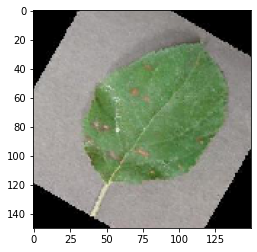

In [22]:
predict_it("C:\\Users\\kariketi.t.reddy\\Downloads\\Plants_disease_dataset\\New Plant Diseases Dataset(Augmented)\\New Plant Diseases Dataset(Augmented)\\train\\Apple___Cedar_apple_rust\\0a41c25a-f9a6-4c34-8e5c-7f89a6ac4c40___FREC_C.Rust 9807_new30degFlipLR.JPG")

1/1 [==============================] - 0s 43ms/step
Tomato___Early_blight


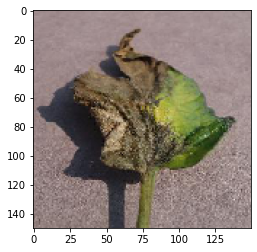

In [23]:
predict_it("C:\\Users\\kariketi.t.reddy\\Downloads\\Plants_disease_dataset\\New Plant Diseases Dataset(Augmented)\\New Plant Diseases Dataset(Augmented)\\train\\Tomato___Late_blight\\0e669afb-1315-4903-b7ca-1a0ffa95d454___RS_Late.B 5626.JPG")

In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)      0

In [25]:
model.save("plant_disease.h5")